## Changing the current working Directory

In [1]:
cd D:/Ineuron/Project_workshop/pcb_defect_detection/delete

D:\Ineuron\Project_workshop\pcb_defect_detection\delete


In [2]:
pwd

'D:\\Ineuron\\Project_workshop\\pcb_defect_detection\\delete'

# Cloning YOLOv5 repo

In [5]:
# clone YOLOv5 repository
git clone https://github.com/ultralytics/yolov5  # clone repo
cd yolov5
git reset --hard fbe67e465375231474a2ad80a4389efc77ecff99

SyntaxError: invalid syntax (60167640.py, line 2)

# Install dependencies as necessary

In [7]:
# !pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
#from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
#print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

# Let's look at our training environment and GPU provided

In [8]:
import torch
from IPython.display import Image  # for displaying images
#from utils.downloads import gdrive_download  # for downloading models/datasets
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.12.1+cpu CPU


# Lets get the number of class from data.yml file

In [15]:
data_yml_path = r'D:/Ineuron/Project_workshop/pcb_defect_detection/data.yaml'


# define number of classes based on YAML
import yaml
with open(data_yml_path, 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [16]:
num_classes

'6'

# Let's write the number of class in `yolo small` model `yaml file`

In [19]:
# save the custom yaml file at `yolov5/models/`   location

# Train Custom YOLOv5 Detector

Next, we'll fire off training!:

Here, we are able to pass a number of arguments:


1.   `img:` define input image size
2.   `batch:` determine batch size
1.   `epochs:` define the number of training epochs. (Note: often, 3000+ are common here!)
2.   `data:` set the path to our yaml file
1.   `cfg:` specify our model configuration
2.   `weights:` specify a custom path to weights. (Note: you can download weights from the Ultralytics Google Drive folder)
1.   `name:` result names
2.   `batch:` determine batch size
1.   `nosave:` only save the final checkpoint
2.   `cache:` cache images for faster training



In [22]:
cd D:/Ineuron/Project_workshop/pcb_defect_detection/delete/yolov5

D:\Ineuron\Project_workshop\pcb_defect_detection\delete\yolov5


In [26]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [25]:
!python train.py --img 416 --batch 16 --epochs 3 --data D:/Ineuron/Project_workshop/pcb_defect_detection/delete/train_val_test/train_val_test/data.yaml --cfg D:/Ineuron/Project_workshop/pcb_defect_detection/delete/yolov5/models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache

^C


# Evaluate Custom YOLOv5 Detector Performance

Training losses and performance metrics are saved to Tensorboard and also to a logfile defined above with the --name flag when we train. In our case, we named this yolov5s_results. (If given no name, it defaults to results.txt.) The results file is plotted as a png after training completes.


Note from Glenn: Partially completed results.txt files can be plotted with from utils.utils import plot_results; plot_results().

In [12]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
tensorboard --logdir runs

SyntaxError: invalid syntax (2200306538.py, line 4)

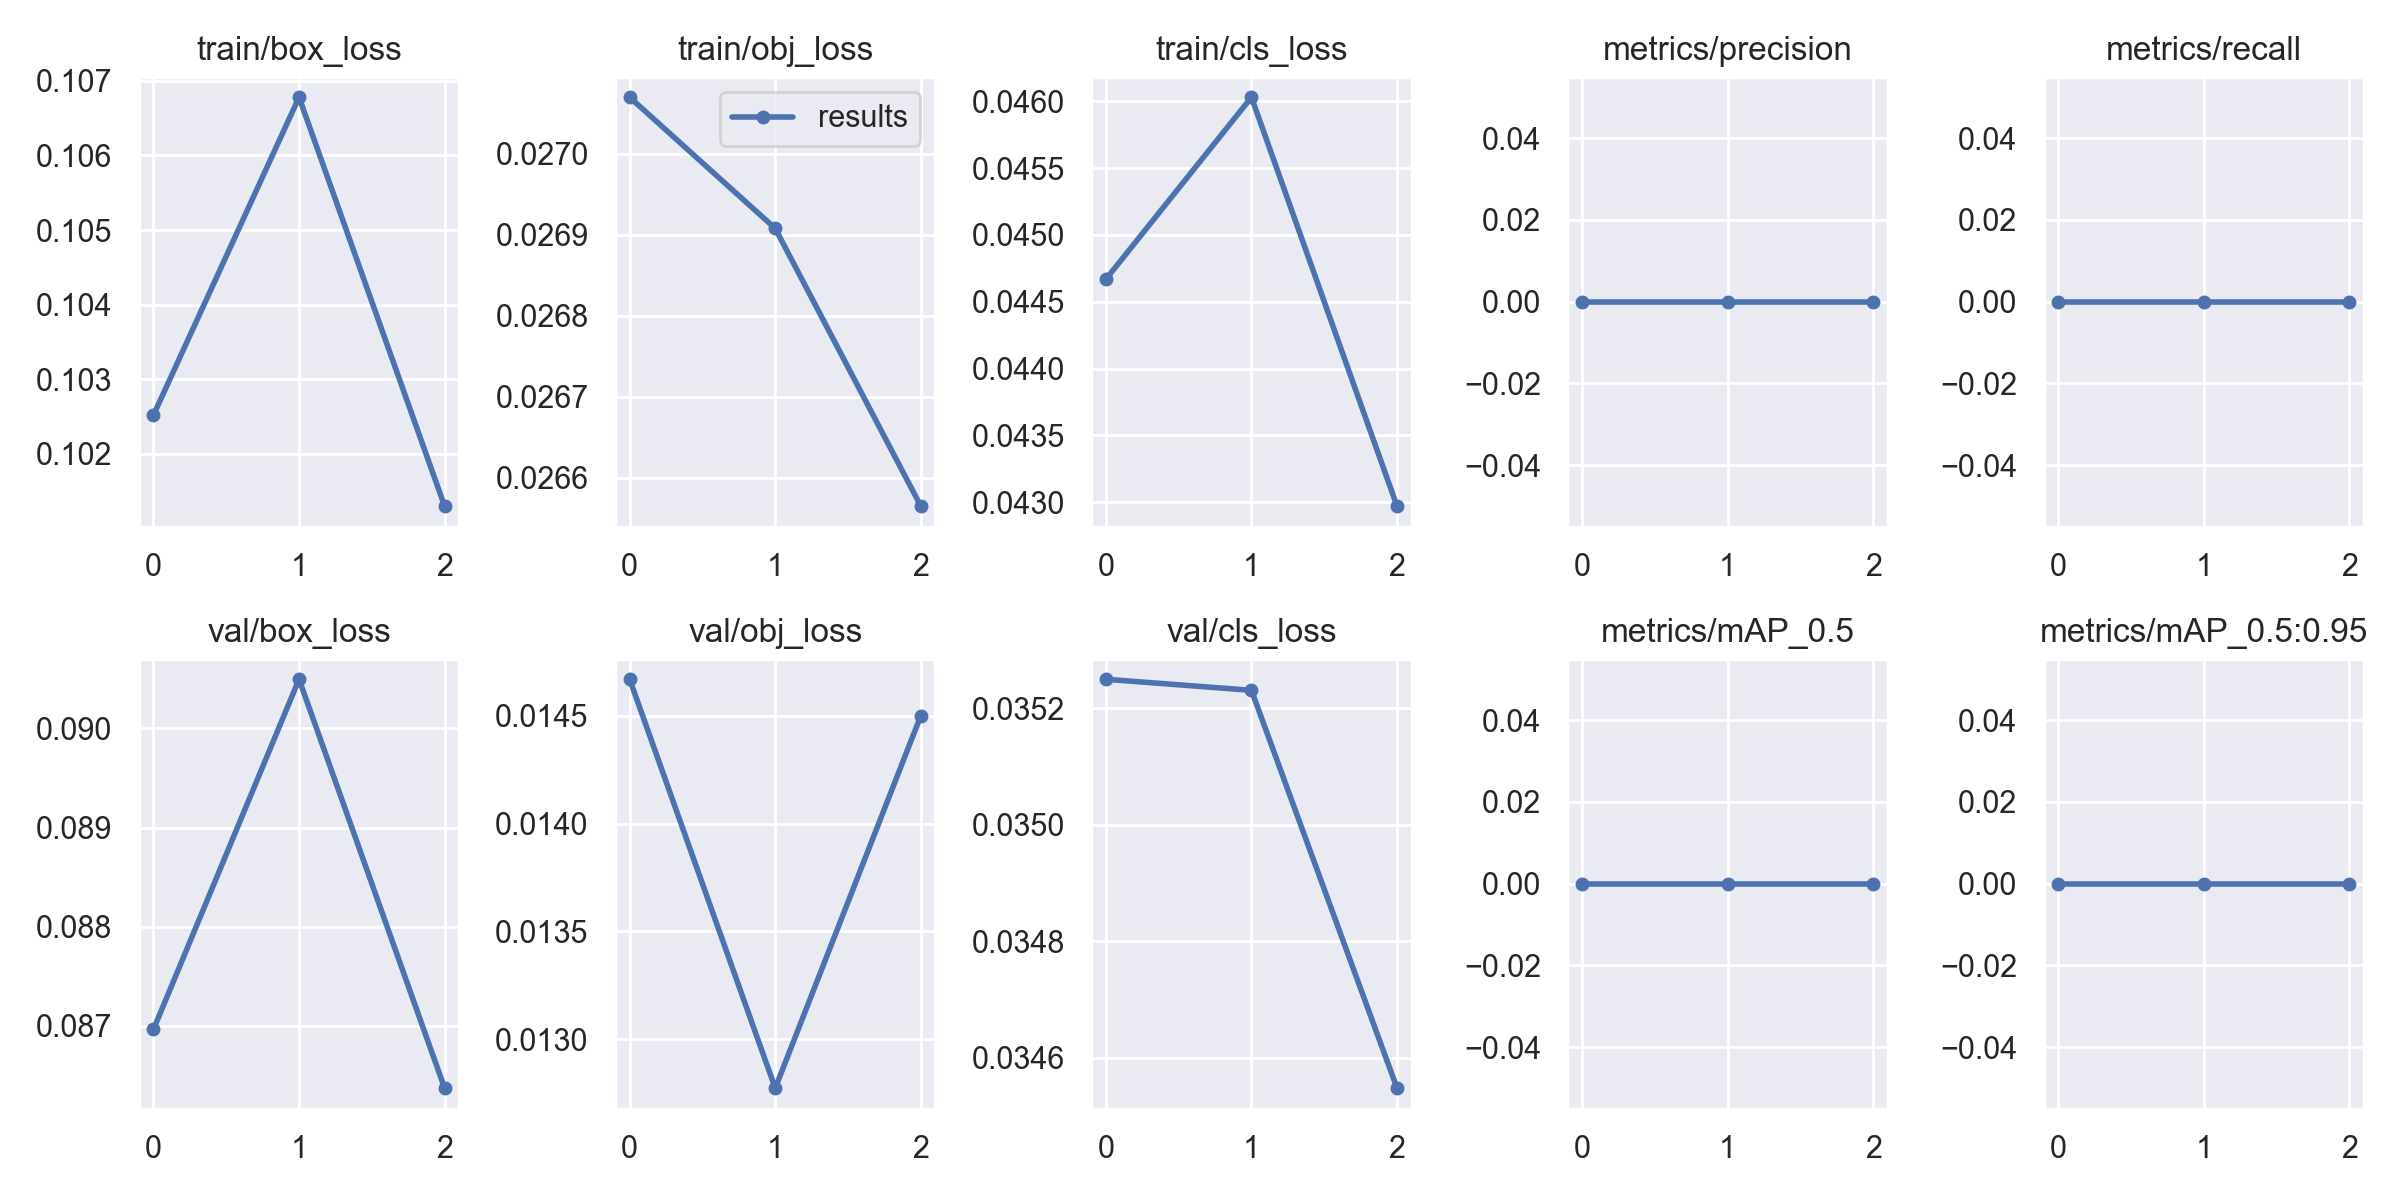

In [5]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
from PIL import Image
Image.open('D:/Ineuron/Project_workshop/pcb_defect_detection/delete/yolov5/runs/train/yolov5s_results3/results.png')  # view results.png


# Curious? Visualize Our Training Data with Labels

After training starts, view train*.jpg images to see training images, labels and augmentation effects.

Note a mosaic dataloader is used for training (shown below), a new dataloading concept developed by Glenn Jocher and first featured in YOLOv4.

GROUND TRUTH TRAINING DATA:


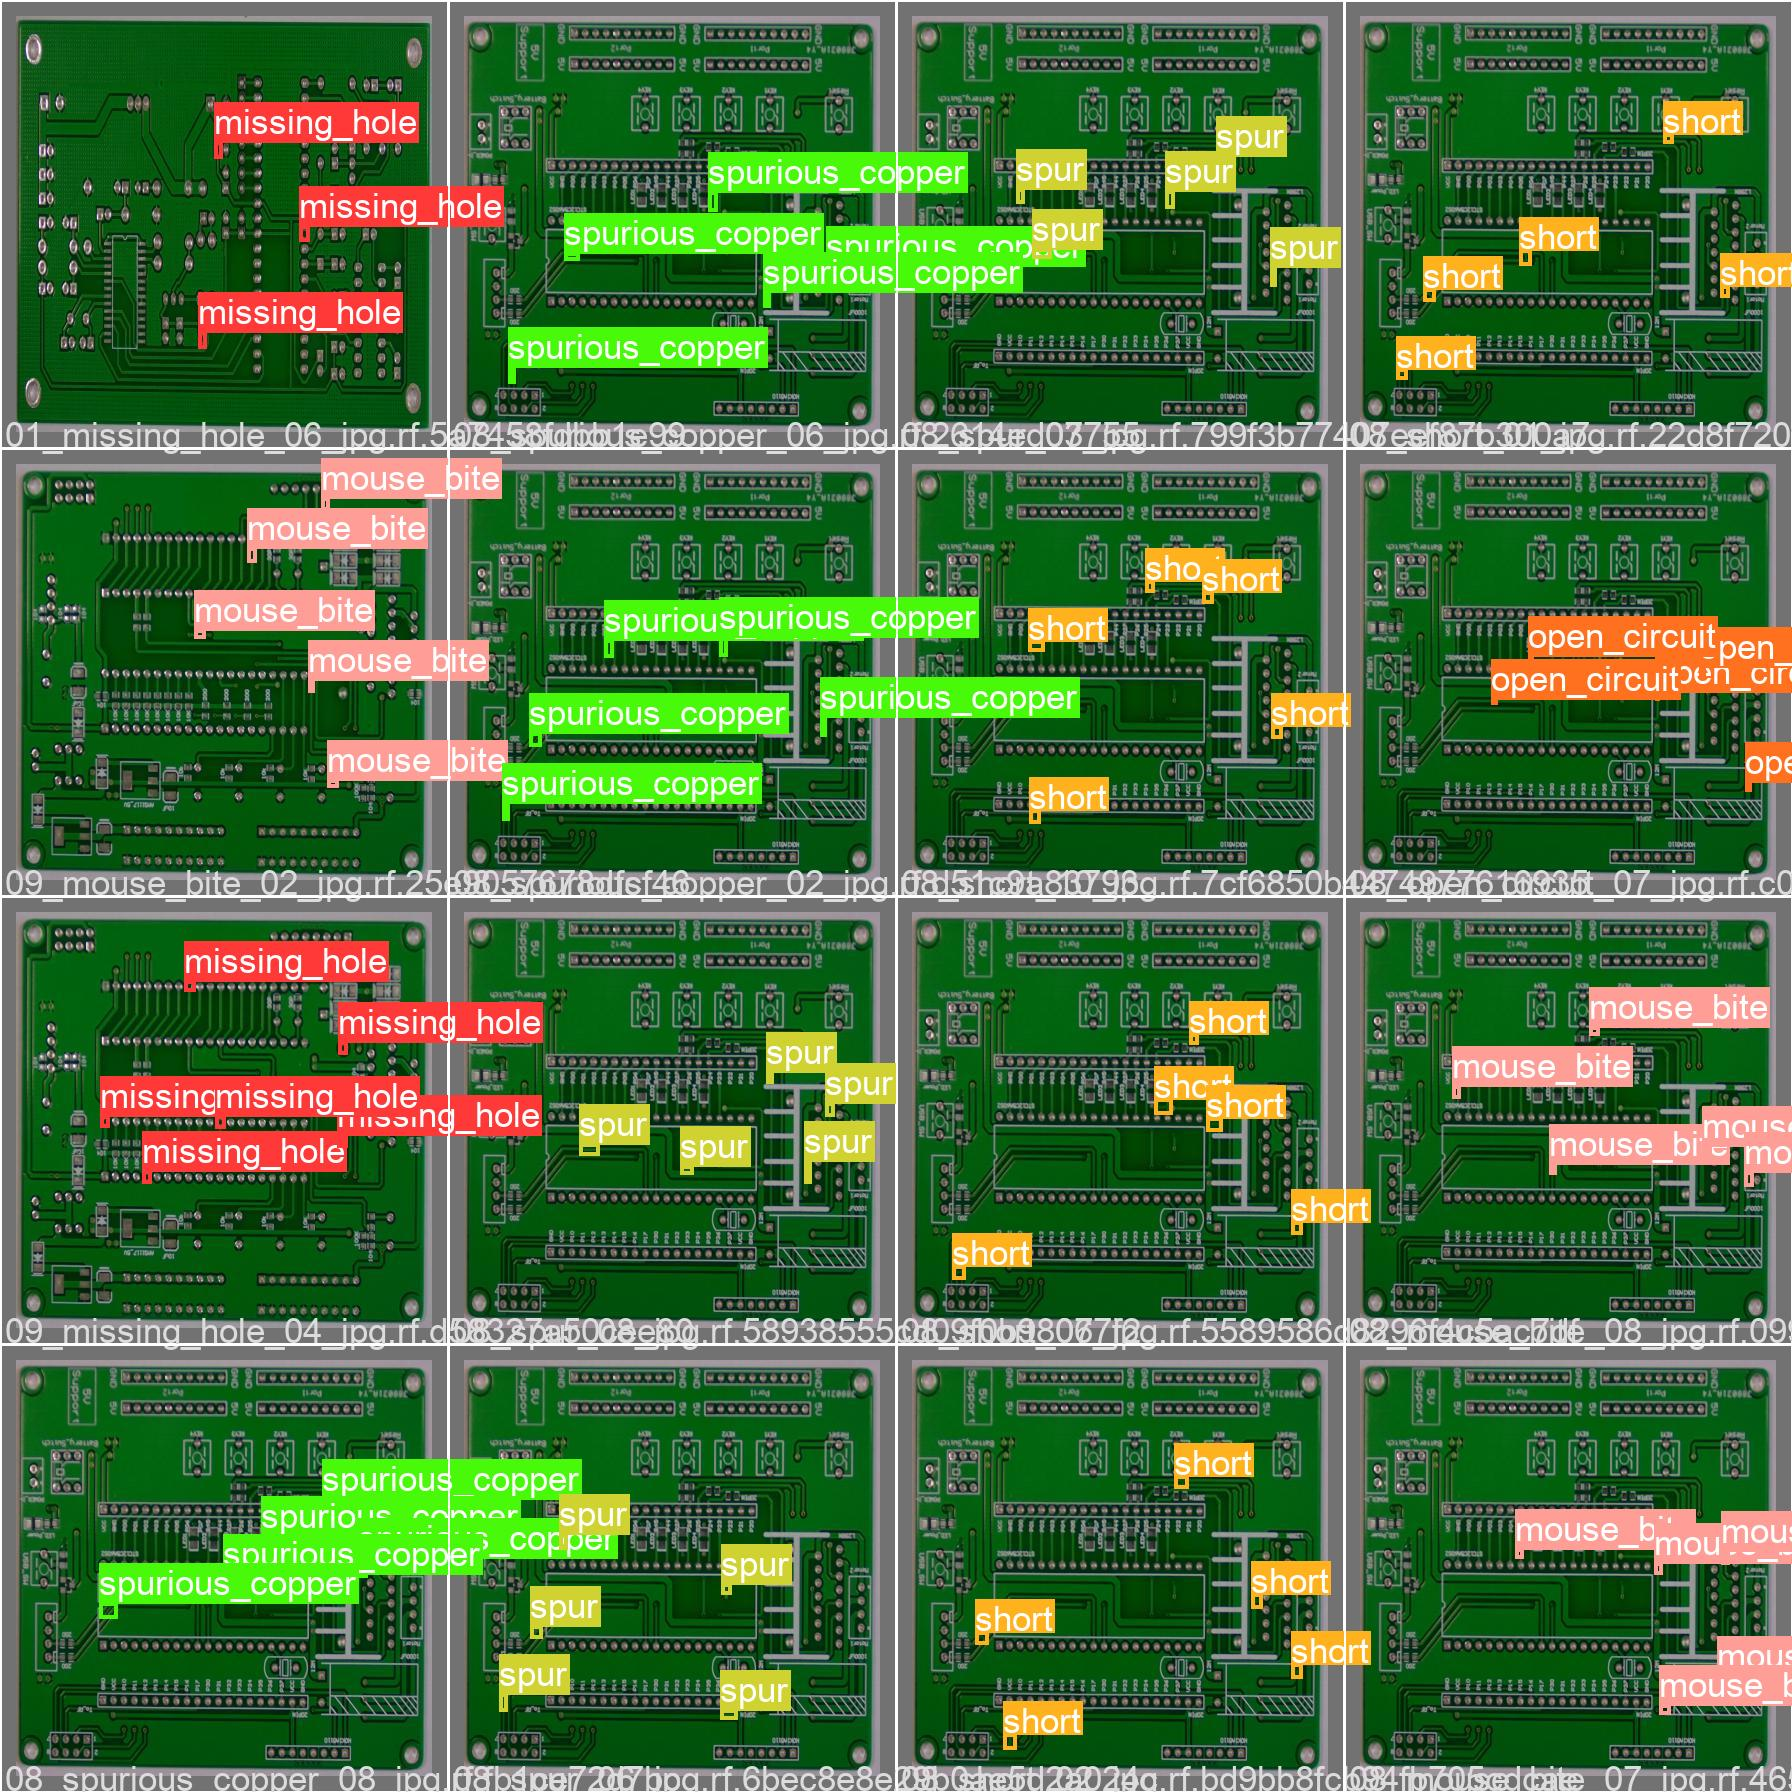

In [6]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image.open('D:/Ineuron/Project_workshop/pcb_defect_detection/delete/yolov5/runs/train/yolov5s_results3/val_batch0_labels.jpg')

GROUND TRUTH AUGMENTED TRAINING DATA:


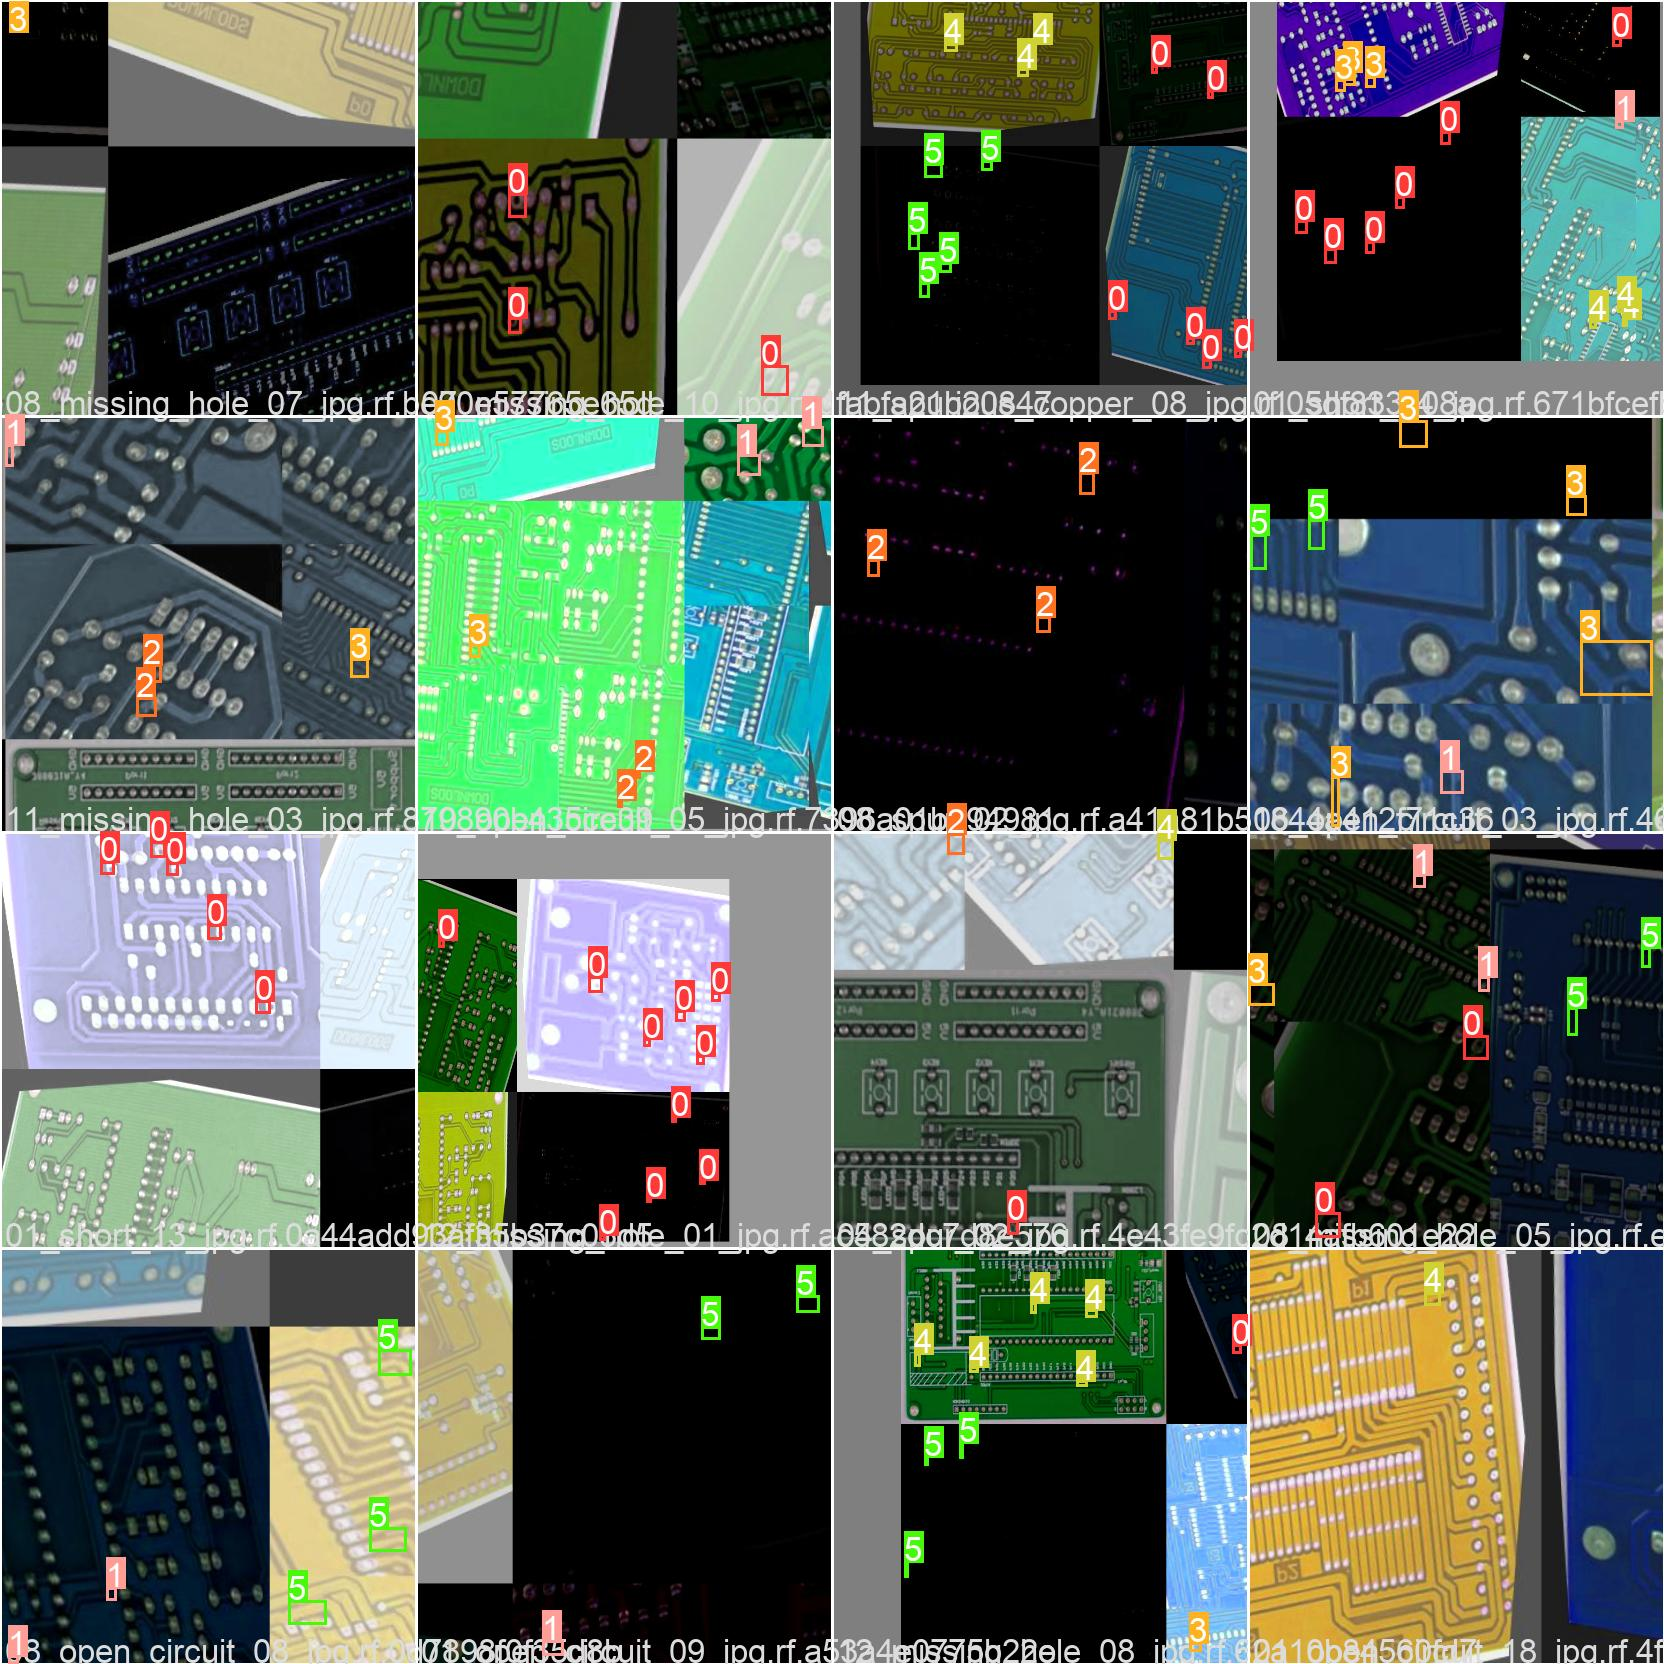

In [7]:
# print out an augmented training example

print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image.open('D:/Ineuron/Project_workshop/pcb_defect_detection/delete/yolov5/runs/train/yolov5s_results3/train_batch0.jpg')

# Run Inference With Trained Weights

Run inference with a pretrained checkpoint on contents of test/images folder

In [ ]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
cd /content/yolov5/
python detect.py --weights D:/Ineuron/Project_workshop/pcb_defect_detection/delete/yolov5/runs/train/yolov5s_results3/weights/best.pt --img 416 --conf 0.03 --source D:/Ineuron/Project_workshop/pcb_defect_detection/delete/train_val_test/train_val_test/test/images

In [ ]:
python detect.py --weights D:/Ineuron/Project_workshop/pcb_defect_detection/delete/yolov5/runs/train/yolov5s_results3/weights/best.pt --img 416 --conf 0.005 --source D:/Ineuron/Project_workshop/pcb_defect_detection/delete/train_val_test/train_val_test/test/images

# Export Trained Weights for Future Inference

Now that you have trained your custom detector, you can export the trained weights you have made here for inference on your device elsewhere

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
%cp /content/yolov5/runs/train/yolov5s_results/weights/best.pt /content/gdrive/MyDrive/Research/SignLanguageDetection

# Reference blogs

- https://towardsdatascience.com/how-to-train-a-custom-object-detection-model-with-yolo-v5-917e9ce13208

- https://github.com/entbappy/Sign-Language-Generation-From-Video-using-YOLOV5

